# 电影评论情感分析--机器学习--多项式朴素贝叶斯

<h2>导入numpy，pandas，sklearn包</h2>

In [1]:
import pandas as pd
import numpy as np 
from sklearn.naive_bayes import MultinomialNB  
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer,TfidfVectorizer
import nltk
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection   import train_test_split
import matplotlib.pyplot as plt
from pylab import *
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060]
[nltk_data]     由于连接方在一段时间后没有正确答复或连接的主机没有反应，连接尝试失败。>


False

<h2>导入训练数据，停词表</h2>

In [3]:
#加载电影评分
train = "movie-review-sentiment-analysis-kernels-only/train.tsv"
train=pd.read_csv(train,sep='\t')
#常用英文停词
#stoplist = ['very','ourselves', 'am', 'doesn', 'through', 'me', 'against', 'up', 'just', 'her', 'ours','couldn', 'because', 'is', 'isn', 'it', 'only', 'in', 'such', 'too', 'mustn', 'under', 'their','if', 'to', 'my', 'himself', 'after', 'why', 'while', 'can', 'each', 'itself', 'his', 'all', 'once', 'herself', 'more', 'our', 'they', 'hasn', 'on', 'ma', 'them', 'its', 'where', 'did', 'll', 'you','didn', 'nor', 'as', 'now', 'before', 'those', 'yours', 'from', 'who', 'was', 'm', 'been', 'will','into', 'same', 'how', 'some', 'of', 'out', 'with', 's', 'being', 't', 'mightn', 'she', 'again', 'be', 'by', 'shan', 'have', 'yourselves', 'needn', 'and', 'are', 'o', 'these', 'further', 'most', 'yourself','having', 'aren', 'here', 'he', 'were', 'but', 'this', 'myself', 'own', 'we', 'so', 'i', 'does', 'both','when', 'between', 'd', 'had', 'the', 'y', 'has', 'down', 'off', 'than', 'haven', 'whom', 'wouldn','should', 've', 'over', 'themselves', 'few', 'then', 'hadn', 'what', 'until', 'won', 'no', 'about','any', 'that', 'for', 'shouldn', 'don', 'do', 'there', 'doing', 'an', 'or', 'ain', 'hers', 'wasn','weren', 'above', 'a', 'at', 'your', 'theirs', 'below', 'other', 'not', 're', 'him', 'during', 'which']
cachedStopWords = stopwords.words("english")

<h2>去掉停词</h2>

In [4]:
def removeStopword(x):
    text = x['Phrase']
    return  str(' '.join([word for word in text.split() if word not in cachedStopWords]))
train['Phrasenostopword'] = train.apply(lambda x: removeStopword(x), axis=1)

<h2>构建训练tfidf模型词表Token</h2>

In [5]:
tfidf_model = TfidfVectorizer(binary=False,decode_error='ignore',)
tfidf_model.fit(train['Phrasenostopword'].values.tolist())

TfidfVectorizer(analyzer='word', binary=False, decode_error='ignore',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [6]:
train_xword = train['Phrasenostopword'].values.tolist()
train_xword
from sklearn.feature_extraction.text import TfidfVectorizer as TFIDF
vec = TFIDF()
X = vec.fit_transform(train_xword)
y = train.iloc[:, 3].values

<h3>分为测试集与训练集</h3>

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, random_state = 0)

<h3>多项式朴素贝叶斯建模</h3>

In [8]:
clf = MultinomialNB().fit(X_train, y_train)
clf.score(X_test,y_test)

0.5909265667051135

<h3>多项式朴素贝叶斯得分</h3>

In [15]:
clf.score(X_test,y_test)

0.5909265667051135

<h3>交叉验证，进行多次调参</h3>

In [16]:
times = 100
clfcrvs = MultinomialNB()
scores = cross_val_score(clfcrvs, X, y, cv=times)

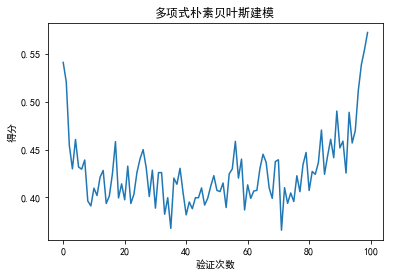

In [17]:
mpl.rcParams['font.sans-serif'] = ['SimHei']
plt.title('多项式朴素贝叶斯建模')
plt.xlabel("验证次数")
plt.ylabel("得分")
plt.plot(range(times), scores)

<h3>SVM支持向量机</h3>

In [18]:
from sklearn.svm import SVC

In [ ]:
ctimes = 5
svc = SVC(gamma=2, C=1)
svcscores = cross_val_score(svc, X, y, cv=ctimes)

In [ ]:
mpl.rcParams['font.sans-serif'] = ['SimHei']
plt.title('SVM建模')
plt.xlabel("验证次数")
plt.ylabel("得分")
plt.plot(range(ctimes), svcscores)

In [68]:
svc = SVC(kernel='rbf',gamma=2, C=1)

In [69]:
svc.fit(X_test,y_test)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=2, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [71]:
svc.score(X, y)

0.550237088299372

In [58]:
svc.predict(X_test[1].toarray())

array([4], dtype=int64)

# 第二种数据集

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # 画图常用库
import re  #正则表达式
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer


In [4]:
train = pd.read_csv('word2vec-nlp-tutorial/labeledTrainData.tsv', delimiter="\t")
# test = pd.read_csv('word2vec-nlp-tutorial/testData.tsv', delimiter="\t")
train.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


In [7]:

def review_to_wordlist(review):
    #只保留英文单词
    review_text = re.sub("[^a-zA-Z]"," ", review)
    
    #变成小写
    words = review_text.lower()
    
    return(words)

# 把训练集的文本和标注分开
# 1. 把标注提取出来
y_train_1 = train['sentiment']

# 2. 把文本提取出来
train_data = []
for review in train['review']:
    train_data.append(review_to_wordlist(review))
    
# 3. 转化成numpy数组        
train_data = np.array(train_data)


In [9]:
tfidf = TfidfVectorizer(ngram_range=(1, 3), use_idf=1,smooth_idf=1,stop_words = 'english') # 去掉英文停用词
data_train_count = tfidf.fit_transform(train_data)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(data_train_count, y_train_1, test_size = 0.2, random_state = 0)

In [14]:
from sklearn.naive_bayes import MultinomialNB 

clf = MultinomialNB()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)


In [16]:
#测试集分数
clf.score(X_test, y_test)

0.8846

In [17]:
#训练集分数
clf.score(X_train, y_train)

0.9978

In [19]:
#预测值的预测分数分布
clf.predict_proba(X_test)

array([[0.49031677, 0.50968323],
       [0.42515661, 0.57484339],
       [0.42514622, 0.57485378],
       ...,
       [0.36091834, 0.63908166],
       [0.70188293, 0.29811707],
       [0.35743091, 0.64256909]])

In [20]:
times = 20
scores = cross_val_score(clf, X_train, y_train, cv=times)

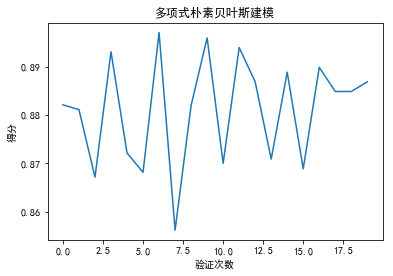

In [21]:
mpl.rcParams['font.sans-serif'] = ['SimHei']
plt.title('多项式朴素贝叶斯建模')
plt.xlabel("验证次数")
plt.ylabel("得分")
plt.plot(range(times), scores)

In [22]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_recall_curve,average_precision_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.externals import joblib

In [25]:
# 测试集精确度
accuracy_score(y_test, pred)

0.8846

In [28]:
#混淆矩阵
confusion_matrix(y_test, pred, labels=None, sample_weight=None)

array([[2234,  314],
       [ 263, 2189]], dtype=int64)

In [29]:
from sklearn.metrics import roc_curve, auc


In [37]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred, pos_label=1)
precision, recall, threshold = precision_recall_curve(y_test, pred)#精确度，召回率，阈值

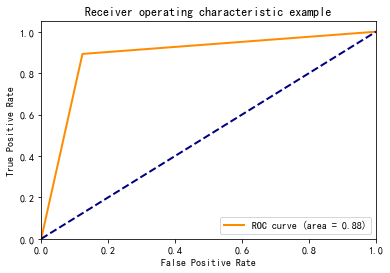

In [33]:
#生成roc曲线
import matplotlib.pyplot as plt
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % accuracy_score(y_test, pred))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [35]:
#f1score
metrics.f1_score(y_test, pred)#发 score

0.8835519677093845

In [39]:
metrics.auc(recall, precision)# auc面积 

0.9099455796274487

In [42]:
from sklearn.externals import joblib
joblib.dump(tfidf,'tf_model.m')
joblib.dump(clf,'clf_model.m')

d:\python3.5\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['tf_model.m']

In [45]:
tfidf=joblib.load('tf_model.m')

In [49]:
clf1=joblib.load('clf_model.m')